In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/shubham/Projects/kaggle/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

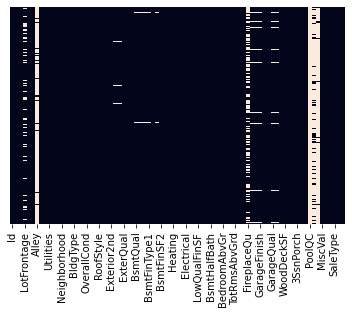

In [4]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [5]:
df_columns = df.columns
df_columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.isnull().mean().sort_values(ascending=False)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

In [7]:
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df.drop(columns=columns_to_drop,inplace=True)

<AxesSubplot:>

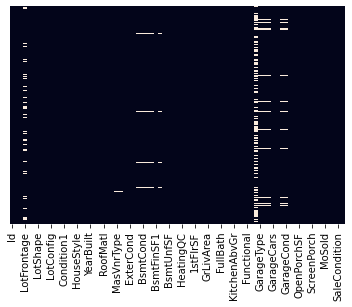

In [8]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [9]:
df.isnull().mean().sort_values(ascending=False)

FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
                  ...   
BsmtUnfSF       0.000000
TotalBsmtSF     0.000000
MSSubClass      0.000000
HeatingQC       0.000000
SalePrice       0.000000
Length: 77, dtype: float64

In [10]:
df['FireplaceQu'].isnull().sum()/1461

0.4722792607802875

In [11]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [12]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

In [13]:
missing_value_columns = [column for column in df.columns if df[column].isnull().mean()>0]
missing_value_columns

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [14]:
# finding features which have categorical value
categorical_columns = [column for column in missing_value_columns if len(df[column].unique())<25]
categorical_columns

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [15]:
for column in categorical_columns:
    print(column+" "+df[column].mode()[0])

MasVnrType None
BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Electrical SBrkr
FireplaceQu Gd
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA


In [16]:
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0],inplace=True)

In [17]:
df.isnull().mean().sort_values(ascending=False)

LotFrontage     0.177397
GarageYrBlt     0.055479
MasVnrArea      0.005479
Id              0.000000
BedroomAbvGr    0.000000
                  ...   
ExterQual       0.000000
MasVnrType      0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
SalePrice       0.000000
Length: 77, dtype: float64

In [18]:
print(type(df['LotFrontage'][0]))
print(type(df['GarageYrBlt'][0]))
print(type(df['MasVnrArea'][0]))

# All are float, hence we can put mean in missing values

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [19]:
df['LotFrontage'].mean()
# df['GarageYrBlt'].mean()
# df['MasVnrArea'].mean()

70.04995836802665

In [20]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)

In [21]:
df.isnull().mean().sort_values(ascending=False)

Id             0.0
HalfBath       0.0
FireplaceQu    0.0
Fireplaces     0.0
Functional     0.0
              ... 
MasVnrArea     0.0
MasVnrType     0.0
Exterior2nd    0.0
Exterior1st    0.0
SalePrice      0.0
Length: 77, dtype: float64

In [22]:
df.shape

(1460, 77)

<AxesSubplot:>

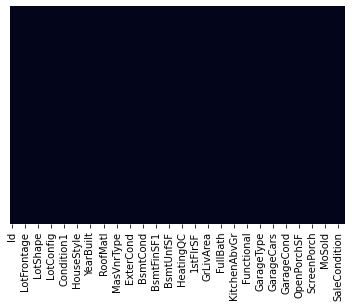

In [23]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [24]:
df_categorical_columns = [column for column in df.columns if len(df[column].unique())<25]
df_categorical_columns

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [25]:
len(df_categorical_columns)

56

In [26]:
for c in df_categorical_columns:
    print(df[c].unique())

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
[ 7  6  8  5  9  4 10  3  1  2]
[5 8 6 7 4 2 3 9 1]
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
['BrkFace' 'None' 'Ston

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [28]:
df.drop(['Id'], axis=1, inplace=True)

In [29]:
main_df=df.copy()

In [30]:
test_df=pd.read_csv('formulatedtest.csv')

In [31]:
test_df.shape

(1459, 76)

In [32]:
test_df.drop(columns=['Id'],inplace=True)

In [33]:
test_df.shape

(1459, 75)

In [34]:
df.shape

(1460, 76)

In [35]:
final_df=pd.concat([df,test_df],axis=0)

In [36]:
final_df.shape

(2919, 76)

In [62]:
pd.set_option("display.max_rows", None)
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.000000,8450,7,5,2003,2003,196.000000,706.000000,0.000000,...,0,0,1,1,0,0,0,0,1,0
1,20,80.000000,9600,6,8,1976,1976,0.000000,978.000000,0.000000,...,0,0,1,1,0,0,0,0,1,0
2,60,68.000000,11250,7,5,2001,2002,162.000000,486.000000,0.000000,...,0,0,1,1,0,0,0,0,1,0
3,70,60.000000,9550,7,5,1915,1970,0.000000,216.000000,0.000000,...,0,0,1,0,0,0,0,1,0,0
4,60,84.000000,14260,8,5,2000,2000,350.000000,655.000000,0.000000,...,0,0,1,1,0,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.000000,732.000000,0.000000,...,0,0,1,1,0,0,0,0,0,0
6,20,75.000000,10084,8,5,2004,2005,186.000000,1369.000000,0.000000,...,0,0,1,1,0,0,0,0,1,0
7,60,70.049958,10382,7,6,1973,1973,240.000000,859.000000,32.000000,...,0,0,1,1,0,0,0,0,1,0
8,50,51.000000,6120,7,5,1931,1950,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,1,0,0
9,190,50.000000,7420,5,6,1939,1950,0.000000,851.000000,0.000000,...,0,0,1,1,0,0,0,0,1,0


In [38]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [39]:
categorical_columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [40]:
final_df=category_onehot_multcols(categorical_columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [41]:
final_df.shape

(2919, 237)

In [42]:
~final_df.columns.duplicated()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,

In [43]:
final_df.loc[:,:]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,1,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,1,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,0,0,0,1,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,1,0,1


In [44]:
final_df.loc[:,:2]

TypeError: cannot do slice indexing on Index with these indexers [2] of type int

In [45]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [46]:
final_df.shape

(2919, 177)

In [69]:
df_train=final_df.iloc[0:1460,:]
df_train.shape

(1460, 177)

In [70]:
df_train.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,1,0,0,1,0,0,0,0,0,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,1,1,0,0,0,0,0,0
1459,20,75.0,9937,5,6,1965,1965,0.0,830.0,290.0,...,0,0,1,1,0,0,0,0,0,0


In [72]:
df_test=final_df.iloc[1460:,:]

In [73]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [74]:
# df_test.drop(['SalePrice'],inplace=True,axis=1)
df_test.drop(['SalePrice'],axis=1,inplace=True)

/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [75]:
X_train = df_train.drop(['SalePrice'],axis=1)

In [76]:
y_train = df_train['SalePrice']

# Prediction

In [77]:
import xgboost
classifier=xgboost.XGBRegressor()

In [78]:
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [79]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497 entries, 1422 to 1458
Columns: 176 entries, MSSubClass to P
dtypes: float64(11), int64(25), uint8(140)
memory usage: 637.4 KB


In [80]:
y_pred=classifier.predict(df_test)
len(y_pred)

1459

In [81]:
y_pred

array([128768.266, 156709.53 , 194534.4  , ..., 179933.33 , 101992.94 ,
       237086.4  ], dtype=float32)

In [83]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv("sample_submission.csv")
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets

,Id,SalePrice
0,1461,128768.265625
1,1462,156709.531250
2,1463,194534.406250
3,1464,188428.375000
4,1465,186321.890625
5,1466,174972.078125
6,1467,169778.328125
7,1468,175893.937500
8,1469,188187.046875
9,1470,120117.906250


In [85]:
datasets.to_csv('submission.csv',index=False)